# Get Training Data


In [4]:
#Get Training Data. Survived values are the train_labesls
import pandas as pd
data = pd.read_csv(r'E:\Study n Work\Kaggle\Titanic Machine Learning from Disaster\Data\train.csv')

print("Training_Dataset: \nSize = {1} \nFeatures = {0}".format(data.columns.values,data.shape))

Training_Dataset: 
Size = (891, 12) 
Features = ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
#del PassengerId
del data["PassengerId"]
print(data.shape)

(891, 11)


# Feature Pclass

In [6]:
#Feature Pclass
print('Feature - Pclass')
print("No. of nan: %d\n"%sum(data['Pclass'].isnull()))
print("Correlation between Pclass and Survived:")
data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

Feature - Pclass
No. of nan: 0

Correlation between Pclass and Survived:


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Feature Sex

In [7]:
#Feature- Sex
print('Feature - Sex')
print("No. of nan = %d\n" %sum(data['Sex'].isnull()))
print('Correlation between Sex and Survived:')
data[['Sex','Survived']].groupby('Sex',as_index=False).mean()

Feature - Sex
No. of nan = 0

Correlation between Sex and Survived:


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
#Assign female = 0 and male = 1
data['Sex'] = data['Sex'].replace({'female':0,'male':1})
data[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


# Feature Sibsp

In [9]:
#Feature - SibSp = Sibling and Spouse
data[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Feature Parch

In [10]:
#Feature - Parch = Parent and Children
data[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [11]:
#Feature Family = SibSp + Parch (which  gives more good probability
data['Family'] = data['Parch'] + data['SibSp']
data.Family = data.Family.map(lambda x : 4 if x>=4 or x==0 else x)
del data['Parch']
del data['SibSp']
data[['Family','Survived']].groupby('Family',as_index=False).mean()

,Family,Survived
0,1,0.552795
1,2,0.578431
2,3,0.724138
3,4,0.288815


# Feature Cabin

In [12]:
#Feature - Cabin contains 687/891 nan values
print("Nan values :  %d" %sum(data['Cabin'].isnull()))
del data['Cabin']

Nan values :  687


# Feature Embarked

In [13]:
#Feature - Embarked =  null values are only 2 replaced them with S.
data['Embarked'] = data['Embarked'].fillna('A')
print(data['Embarked'].value_counts())
print(data.Pclass[data.Embarked == 'C'].value_counts())
data['Embarked'] = data['Embarked'].replace({'A':'S'})
data[['Embarked','Survived']].groupby('Embarked').mean()

S    644
C    168
Q     77
A      2
Name: Embarked, dtype: int64
1    85
3    66
2    17
Name: Pclass, dtype: int64


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [14]:
#Assign C Q S = 0 1 2
data['Embarked'] = data['Embarked'].replace({'C':0,'Q':1,'S':2})

# Feature Name

In [15]:
#Feature Name
data.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [16]:
#Feature Name
data['Title'] = data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Sir               1
Capt              1
Ms                1
Lady              1
Mme               1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

In [17]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Ms':'Miss','Dr':'Mr','Lady' : 'Mrs','Sir':'Mr'})
data['Title'] = data['Title'].map(lambda x : 'other' if x!='Mr' and x!='Mrs' and x!='Miss' and x!='Master' else x)
data[['Title','Survived']].groupby('Title',as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.161905
3,Mrs,0.793651
4,other,0.266667


In [18]:
#Assign Master , Miss, Mr, Mrs, other = 0,1,2,3,4
del data['Name'] 
data['Title'] = data['Title'].replace({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'other':4})
data[['Title','Survived']].groupby('Title',as_index=False).mean()

,Title,Survived
0,0,0.575000
1,1,0.702703
2,2,0.161905
3,3,0.793651
4,4,0.266667


# Feature Age

In [19]:
#Feature Age
sum(data.Age.isnull())

177

In [20]:
data.Title[data.Age.isnull()].value_counts()

2    120
1     36
3     17
0      4
Name: Title, dtype: int64

In [21]:
import math
m1 = data.Age[data.Title == 1].mean()
m2 = data.Age[data.Title == 2].mean()
m3 = data.Age[data.Title == 3].mean()
print(m1,m2,m3)
for i,x in enumerate(data['Age']):
    if(math.isnan(x)):
        if(data.iloc[i,8]==0):
            data.iloc[i,3] = m1
        if(data.iloc[i,8]==1):
            data.iloc[i,3] = m1
        if(data.iloc[i,8]==2):
            data.iloc[i,3] = m2
        if(data.iloc[i,8]==3):
            data.iloc[i,3] = m3
    else:
        data.iloc[i,3] = x
data.Title[data.Age.isnull()].value_counts()

21.845637583892618 32.55185185185185 36.00917431192661


Series([], Name: Title, dtype: int64)

In [22]:
del data['Ticket']

In [23]:
data = data.iloc[:,0:8]

In [24]:
data.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family',
       'Title'], dtype=object)

# Making Dataset And Labels

In [26]:
#making dataset and labels
import numpy as np
train_dataset = np.array(data.iloc[:,1:8]).reshape(891,7)
train_labels = np.array(data.iloc[:,0]).reshape(891,1)

#normalizing the train_dataset = (value-avg)/maxV-minV
for i in range(train_dataset.shape[1]):
    avg = train_dataset[:,i].mean()
    maxV = max(train_dataset[:,i])
    minV = min(train_dataset[:,i])
    #std = np.std(train_dataset[:,i]) #standard deviation
    train_dataset[:,i] = (train_dataset[:,i]-avg)/(maxV-minV)

#shuffling dataset
permutation = np.random.permutation(train_dataset.shape[0])
train_dataset = train_dataset[permutation]
train_labels = train_labels[permutation]

#neural_train_labels
neural_train_labels = np.ndarray(shape =(train_labels.shape[0],2),dtype = np.float32)
for i,value in enumerate(train_labels):
    neural_train_labels[i,int(value)] = 1
    neural_train_labels[i,abs(int(value)-1)] = 0


#Test_dataset
test_dataset = np.array(train_dataset[791:891]).reshape(100,7)
test_labels = np.array(train_labels[791:891]).reshape(100,1)
neural_test_labels = np.array(neural_train_labels[791:891]).reshape(100,2)

#Cross_Valid_dataset
valid_dataset = np.array(train_dataset[691:791]).reshape(100,7)
valid_labels = np.array(train_labels[691:791]).reshape(100,1)
neural_valid_labels = np.array(neural_train_labels[691:791]).reshape(100,2)

#train_dataset
train_dataset = np.array(train_dataset[0:691]).reshape(691,7)
train_labels = np.array(train_labels[0:691]).reshape(691,1)
neural_train_labels = np.array(neural_train_labels[0:691]).reshape(691,2)

print(train_dataset.shape , train_labels.shape, neural_train_labels.shape)
print(valid_dataset.shape , valid_labels.shape, neural_valid_labels.shape)
print(test_dataset.shape , test_labels.shape, neural_test_labels.shape)

(691, 7) (691, 1) (691, 2)
(100, 7) (100, 1) (100, 2)
(100, 7) (100, 1) (100, 2)


# Logistic Regression

In [28]:
#Logistic Regression
from sklearn import linear_model
log_reg = linear_model.LogisticRegression(penalty='l2',tol = 0.00001,C=0.01, max_iter=1000000)
log_reg.fit(train_dataset,train_labels)

log_train_prediction = log_reg.predict(train_dataset)
log_valid_prediction = log_reg.predict(valid_dataset)
log_test_prediciton = log_reg.predict(test_dataset)

print("Training_accuracy = %d%%" %(log_reg.score(train_dataset,train_labels)*100))
print("Valid_accuracy = %d%%" %(log_reg.score(valid_dataset,valid_labels)*100))
print("Test_accuracy = %d%%" %(log_reg.score(test_dataset,test_labels)*100))

Training_accuracy = 79%
Valid_accuracy = 72%
Test_accuracy = 74%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree Classifier 

In [29]:
#Decision Tree Classifier.
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(train_dataset,train_labels)

dec_train_prediction = dec_tree.predict(train_dataset)
dec_valid_prediction = dec_tree.predict(valid_dataset)
dec_test_prediction = dec_tree.predict(test_dataset)

print("Training_accuracy = %d%%" %(dec_tree.score(train_dataset,train_labels)*100))
print("Valid_accuracy = %d%%" %(dec_tree.score(valid_dataset,valid_labels)*100))
print("Test_accuracy = %d%%" %(dec_tree.score(test_dataset,test_labels)*100))

Training_accuracy = 98%
Valid_accuracy = 69%
Test_accuracy = 81%


# Random Forest

In [30]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(n_estimators=100)
ran_for.fit(train_dataset,train_labels)

print("Final_Train_Accuracy = %d%%" %(ran_for.score(train_dataset,train_labels)*100))
print("Final_Valid_Accuracy = %d%%" %(ran_for.score(valid_dataset,valid_labels)*100))
print("Final_test_Accuracy = %d%%" %(ran_for.score(test_dataset,test_labels)*100))

Final_Train_Accuracy = 98%
Final_Valid_Accuracy = 79%
Final_test_Accuracy = 80%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


# Neural Network

In [31]:
#Neural Network
import tensorflow as tf
data_size = train_dataset.shape[0]
output_size = 2
hidden_layer1 = 32
#hidden_layer2 = 64
#hidden_layer3 = 128
#hidden_layer4 = 512
beta = 0.0003
start_learning_rate = 0.05

#def makeGraph(hidden_layer1,hidden_layer2,beta,start_learning_rate):

graph = tf.Graph()

with graph.as_default():
    tf_train_dataset = tf.constant(train_dataset,dtype= np.float32)
    tf_valid_dataset = tf.constant(valid_dataset,dtype=np.float32)
    tf_test_dataset = tf.constant(test_dataset,dtype =np.float32)
    tf_train_labels = tf.constant(neural_train_labels)

    layer1_weights = tf.Variable(tf.truncated_normal([7,hidden_layer1],stddev=0.1))
    layer1_biases = tf.Variable(tf.truncated_normal([hidden_layer1],stddev=0.01))
    layer2_weights = tf.Variable(tf.truncated_normal([hidden_layer1,output_size],stddev=0.1))
    layer2_biases = tf.Variable(tf.truncated_normal([output_size],stddev=0.01))
    #layer3_weights = tf.Variable(tf.truncated_normal([hidden_layer2,output_size],stddev=0.1))
    #layer3_biases = tf.Variable(tf.truncated_normal([output_size],stddev=0.01))
    #layer4_weights = tf.Variable(tf.truncated_normal([hidden_layer3,hidden_layer4],stddev=0.1))
    #layer4_biases = tf.Variable(tf.truncated_normal([hidden_layer4],stddev=0.01))
    #layer5_weights = tf.Variable(tf.truncated_normal([hidden_layer4,output_size],stddev=0.1))
    #layer5_biases = tf.Variable(tf.truncated_normal([output_size],stddev=0.01))
    

    logits = tf.matmul(tf_train_dataset,layer1_weights) + layer1_biases
    logits = tf.nn.relu(logits)
    logits = tf.matmul(logits,layer2_weights) + layer2_biases
    #logits = tf.nn.relu(logits)
    #logits = tf.matmul(logits,layer3_weights) + layer3_biases
    #logits = tf.nn.relu(logits)
    #logits = tf.matmul(logits,layer4_weights) + layer4_biases
    #logits = tf.nn.relu(logits)
    #logits = tf.matmul(logits,layer5_weights) + layer5_biases

    regularizer = tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer2_weights) #+ tf.nn.l2_loss(layer3_weights)# + tf.nn.l2_loss(layer4_weights) + tf.nn.l2_loss(layer5_weights)

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=neural_train_labels, logits=logits))
    loss = tf.reduce_mean(loss + regularizer*beta)

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 20000, 0.95, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
    
    #(tf.matmul(tf.nn.relu(tf.matmul(tf.nn.relu(tf.matmul(tf.nn.relu(tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset,layer1_weights) + layer1_biases), layer2_weights)
    #                                                                + layer2_biases),layer3_weights) + layer3_biases),layer4_weights)+layer4_biases),layer5_weights)+layer5_biases)
    neural_train_prediction = tf.nn.softmax(logits)
    neural_valid_prediction = tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset,layer1_weights) + layer1_biases), layer2_weights)+layer2_biases)
    neural_test_prediction = tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset,layer1_weights) + layer1_biases), layer2_weights)+ layer2_biases)
    

In [32]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [33]:
num_steps = 50001
final_weights1 = []
final_biases1 = []
final_weights2 = []
final_biases2 = []
final_weights3 = []
final_biases3 = []
final_weights4 = []
final_biases4 = []
final_weights5 = []
final_biases5 = []

#,final_weights3,final_biases3,final_weights4,final_biases4,final_weights5,final_biases5
#,layer3_weights,layer3_biases,layer4_weights,layer4_biases,layer5_weights,layer5_biases

neural_train_predictions = []
neural_valid_predictions = []
neural_test_predictions = []

#best_hidden1 = 10000
#best_hidden2 = 10000
#best_beta = 10
#best_learning_rate = 10
#best_num_steps = 1000
#best_accuracy = 0
#best_loss = 100
#iters =10

#hidden_layer1 = random.randint(16,256)
#hidden_layer2 = random.randint(16,256)
#beta = random.uniform(0.000003,0.03)
#start_learning_rate = random.uniform(0.003,0.3)
#print("Hidden_layer1 = {0}, Hidden_layer2 = {1}, Beta = {2}, Start_learning_rate = {3}" .format(hidden_layer1, hidden_layer2, beta, start_learning_rate))
#makeGraph(hidden_layer1,hidden_layer2,beta,start_learning_rate)
#acc = 0

J = []

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        feed_dict = {tf_train_dataset : train_dataset, tf_train_labels : neural_train_labels}
        _, l, predictions,final_weights1,final_biases1,final_weights2,final_biases2 = session.run([optimizer, loss, neural_train_prediction,layer1_weights,layer1_biases,layer2_weights,layer2_biases], feed_dict=feed_dict)
        J.append(l)
        if(step%2500==0):
            print("Step : %d"%step)
            print("Training Loss : %f"%l)
            print("Training Accuracy : %d%%" %accuracy(predictions,neural_train_labels))
    neural_train_predictions = neural_train_prediction.eval()
    neural_valid_predictions = neural_valid_prediction.eval()
    neural_test_predictions = neural_test_prediction.eval()
    print("Validation Accuracy : %d%%" %accuracy(neural_valid_prediction.eval(),neural_valid_labels))
    print("Test Accuracy : %d%%" %accuracy(neural_test_prediction.eval(),neural_test_labels))
    
#if(acc>best_accuracy):
#    best_accuracy = acc
#    best_loss = J[len(J)-1]
#    best_num_steps = num_steps
#    best_hidden1 = hidden_layer1
#    best_hidden2 = hidden_layer2
#    best_beta = beta
#    best_learning_rate = start_learning_rate
#print("Best_test_accuracy till now = %d%%"%best_accuracy)
#print(" ")

Initialized
Step : 0
Training Loss : 0.688637
Training Accuracy : 76%
Step : 2500
Training Loss : 0.407191
Training Accuracy : 82%
Step : 5000
Training Loss : 0.392435
Training Accuracy : 83%
Step : 7500
Training Loss : 0.385500
Training Accuracy : 85%
Step : 10000
Training Loss : 0.380481
Training Accuracy : 85%
Step : 12500
Training Loss : 0.375613
Training Accuracy : 85%
Step : 15000
Training Loss : 0.372036
Training Accuracy : 85%
Step : 17500
Training Loss : 0.368324
Training Accuracy : 85%
Step : 20000
Training Loss : 0.364619
Training Accuracy : 85%
Step : 22500
Training Loss : 0.361232
Training Accuracy : 85%
Step : 25000
Training Loss : 0.358397
Training Accuracy : 85%
Step : 27500
Training Loss : 0.356167
Training Accuracy : 85%
Step : 30000
Training Loss : 0.353852
Training Accuracy : 85%
Step : 32500
Training Loss : 0.352357
Training Accuracy : 85%
Step : 35000
Training Loss : 0.351320
Training Accuracy : 85%
Step : 37500
Training Loss : 0.350416
Training Accuracy : 85%
Ste

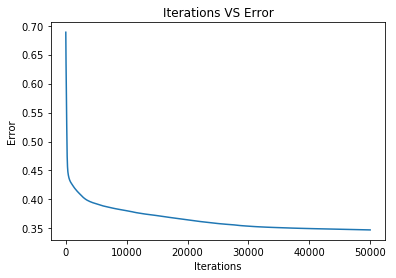

In [35]:
import matplotlib.pyplot as plt
iters = list(range(0,len(J)))
plt.plot(iters,J)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Iterations VS Error')
plt.show()